## Naive Bayes

In [1]:
import pandas as pd
import pickle

In [2]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [3]:
inflation = data.loc[data.topics == 'inflation']
inflation.shape

(33, 7)

In [4]:
exchange = data.loc[data.topics == 'exchange']
exchange.shape

(28, 7)

In [5]:
corpus = inflation.append(exchange)
corpus.shape

(61, 7)

In [6]:
corpus

,topics,date,flyer,title,lead,body,url
0,inflation,29/11/2020,Economía,La enfermedad crónica que tiene Argentina: cas...,Desde la década de 1940 Argentina padece una e...,Argentina sirve como uno de los países más par...,https://derechadiario.com.ar/economia/la-enfer...
1,inflation,12/11/2020,Economía,Se acelera el aumento de precios: la inflación...,El Índice de Precios al Consumidor aumentó un ...,El INDEC divulgó las cifras oficiales para el ...,https://derechadiario.com.ar/economia/se-acele...
2,inflation,11/11/2020,Economía,Socialismo y miseria: la economía venezolana c...,El régimen del dictador Maduro continúa destru...,Desde la toma ilegal del poder de Maduro hace ...,https://derechadiario.com.ar/economia/socialis...
3,inflation,09/11/2020,Economía,“Efecto Lipovetzky”: los alquileres siguen aum...,"La iniciativa del PRO, formulada originalmente...",En un año marcado por las nuevas regulaciones ...,https://derechadiario.com.ar/economia/efecto-l...
4,inflation,02/11/2020,Economía,El Plan Guzmán para llegar a fin de año: más d...,Guzmán lanzó un quinto paquete de medidas orie...,"Esta mañana, el ministro Guzmán lanzó un inusu...",https://derechadiario.com.ar/economia/el-plan-...
...,...,...,...,...,...,...,...
56,exchange,17/04/2020,Economía,El dólar paralelo superó los $100 y ya no pare...,Alberto Fernández es el primero desde Alfonsín...,"“Son manionbras especulativas, al igual que es...",https://derechadiario.com.ar/economia/el-dolar...
57,exchange,14/04/2020,Economía,Se dispara el dólar: alcanzó los 114 pesos y c...,El tipo de cambio CCL escaló hasta la alarmant...,La jornada de hoy se caracterizó por una fuert...,https://derechadiario.com.ar/economia/se-dispa...
58,exchange,04/04/2020,Economía,Inminente levantamiento de las restricciones s...,El gobierno se prepara para levantar el parkin...,"Comisión Nacional de Valores (CNV), Esta decis...",https://derechadiario.com.ar/economia/inminent...
59,exchange,12/03/2020,Economía,Argentina en crisis: se dispara el riesgo país...,"El Riesgo País sigue sin encontrar techo, sube...",Una nueva mañana comenzó este jueves 12 de mar...,https://derechadiario.com.ar/economia/argentin...


#### Train - Test Split

In [7]:
X = corpus.body

In [8]:
y = corpus.topics

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train,test,y_train,y_test = train_test_split(X, y, train_size=0.75); 

In [11]:
train.shape, test.shape

((45,), (16,))

### Tokenization + Vectorization
#### CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re

In [13]:
stopwords_sp = stopwords.words('spanish')

In [14]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [15]:
vectorizer = CountVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode', preprocessor=removal)

In [16]:
vectorizer.fit(list(re.sub(r'(\d|\$|\%|\+)', '', doc) for doc in corpus.body))

CountVectorizer(preprocessor=<function removal at 0x7f2537c87dd0>,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode')

In [17]:
X_train = vectorizer.transform(train);

In [18]:
X_train

<45x4549 sparse matrix of type '<class 'numpy.int64'>'
	with 9380 stored elements in Compressed Sparse Row format>

In [19]:
X_train_matriz = X_train.todense()

In [20]:
X_test = vectorizer.transform(test);

In [21]:
X_test_matriz = X_train.todense()

#### Tf IDf Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
X_train_matriz_tfidf = TfidfTransformer().fit_transform(X_train_matriz);

In [24]:
X_test_matriz_tfidf = TfidfTransformer().fit_transform(X_test_matriz);

### Multinomial Naive Bayes + CountVectorizer

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
multi_nb = MultinomialNB()

multi_nb.fit(X_train, y_train.values)

MultinomialNB()

In [27]:
y_pred = multi_nb.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_pred, y_test.values)

0.875

In [30]:
confusion_matrix(y_pred, y_test.values)

array([[ 4,  0],
       [ 2, 10]])

### Multinomial Naive Bayes + TfIDf

In [31]:
multi_nb_2 = MultinomialNB()

multi_nb_2.fit(X_train_matriz_tfidf, y_train.values)

MultinomialNB()

In [32]:
y_pred = multi_nb_2.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_pred, y_test.values)

0.875

In [35]:
confusion_matrix(y_pred, y_test.values)

array([[ 4,  0],
       [ 2, 10]])

### Tokenization + Vectorization (Manual)

#### CountVectorizer with pre-built tokens

In [36]:
cv_tokens = pickle.load(open('tokens/topic_tokens_der_new.pkl', 'rb'))

In [37]:
vectorizer.fit(cv_tokens.drop('topics', axis=1))

CountVectorizer(preprocessor=<function removal at 0x7f2537c87dd0>,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode')

In [38]:
X_train_2 = vectorizer.transform(train)

In [39]:
X_train_matriz_2 = X_train_2.todense()

In [40]:
X_test_2 = vectorizer.transform(test)

In [41]:
X_test_matriz_2 = X_test_2.todense()

#### TF-IDF Vectorizer with pre-built tokens

In [42]:
X_train_matriz_tfidf_2 = TfidfTransformer().fit_transform(X_train_matriz_2);

In [43]:
X_test_matriz_tfidf_2 = TfidfTransformer().fit_transform(X_test_matriz_2);

### Multinomial Naive Bayes + CountVectorizer (updated tokens)

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
multi_nb = MultinomialNB()

multi_nb.fit(X_train_2, y_train.values)

MultinomialNB()

In [46]:
y_pred_2 = multi_nb.predict(X_test_2)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_pred_2, y_test.values)

0.875

In [49]:
confusion_matrix(y_pred_2, y_test.values)

array([[ 4,  0],
       [ 2, 10]])

### Multinomial Naive Bayes + Tf IDf Vectorizer (updated tokens)

In [50]:
multi_nb_2 = MultinomialNB()

multi_nb_2.fit(X_train_matriz_tfidf_2, y_train.values)

MultinomialNB()

In [51]:
y_pred_2 = multi_nb_2.predict(X_test_matriz_tfidf_2)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_pred_2, y_test.values)

0.875

In [81]:
matrix = confusion_matrix(y_pred_2, y_test.values)
matrix

array([[ 4,  0],
       [ 2, 10]])

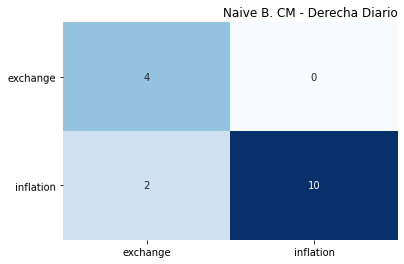

In [105]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues")
plt.xticks([0.5, 1.5],labels=['exchange','inflation'])
plt.yticks([0.5, 1.5],labels=['exchange','inflation'], rotation = 0.5)
plt.title('Naive B. CM - Derecha Diario', loc='right')
plt.show()

In [80]:
pd.DataFrame({'pred':y_pred_2,'actual': y_test, 'match': y_pred_2 == y_test })

,pred,actual,match
50,inflation,exchange,False
10,inflation,inflation,True
54,exchange,exchange,True
37,exchange,exchange,True
25,inflation,inflation,True
27,inflation,inflation,True
0,inflation,inflation,True
22,inflation,inflation,True
11,inflation,inflation,True
17,inflation,inflation,True


##### Multinomial Naive Bayes models finds more trouble to accuretly classify "derecha diario" news by topic. These scores can be explained from the results delivered by the SVD and PCA models, which proved that several news regarding inflation make use rather of a more monetary or financial lexicon to talk about the main topic.